In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
        This is how the DPSO is different    
        ## Sigmoig transfer function
        s = 1/(1 + np.exp(Swarm1.Particles.V[k,:]))
        
#         print(s)
        Swarm1.Particles.X[k,:] = (np.random.rand(Number_Of_Variables) > s)

"""

'\n        This is how the DPSO is different    \n        ## Sigmoig transfer function\n        s = 1/(1 + np.exp(Swarm1.Particles.V[k,:]))\n        \n#         print(s)\n        Swarm1.Particles.X[k,:] = (np.random.rand(Number_Of_Variables) > s)\n\n'

In [26]:
def Optimize_With_PSO(problem,Number_Of_Particles,Number_Of_Iterations,Visualization_Flag):
    
    
    Number_Of_Variables = problem.Number_Of_Variables
    Upper_Bounds = problem.Upper_Bounds
    Lower_Bounds = problem.Lower_Bounds
    
#     Number_Of_Variables = 10 # they called this nVar
#     Upper_Bounds = 10*np.ones(Number_Of_Variables) ## they called thus up
#     Lower_Bounds = -10*np.ones(Number_Of_Variables) ## they called it lb


    
    
    ### Defining the hyperparameters



    # Weight_Of_Inertia = 1 ## This is the hyperparameter "w"
    W_Max = 0.9 ## this is the Initial weight of the inertia
    W_Min = 0.2 ## this is the final weight of the inertia
    c1 = 2 ## This is the individual weight (best found location so far)
    c2 = 2 ## this is the social weight (best found location from team)
    vMax = (Upper_Bounds - Lower_Bounds)*0.2
    vMin = -vMax






    ## initializing the Swarm object


    class Particles(object):
        def __init__(self, Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST):
            self.V = np.zeros((Number_Of_Particles,Number_Of_Variables))
            self.X = np.zeros((Number_Of_Particles,Number_Of_Variables))
            self.O = 10**30*np.ones(Number_Of_Particles)
            for k in range (0,Number_Of_Particles):
                self.X[k,:] = (Upper_Bounds-Lower_Bounds)*np.random.rand(Number_Of_Variables ) + Lower_Bounds
                if np.random.rand() > 0.5:
                    self.X[k,Number_Of_Variables-1] = 1
                else:
                    self.X[k,Number_Of_Variables-1] = 0

            self.PBEST = PBEST(Number_Of_Variables,Number_Of_Particles)

    class PBEST(object):

        def __init__(self,Number_Of_Variables,Number_Of_Particles):
    #             self.X[k,:] = np.zeros(Number_Of_Variables)
                self.X = np.zeros((Number_Of_Particles,Number_Of_Variables))
                self.O = 10**30*np.ones(Number_Of_Particles)



    class GBEST(object):

        def __init__(self,Number_Of_Variables,Number_Of_Particles):
    #             self.X[k,:] = np.zeros(Number_Of_Variables)
                self.X = np.zeros(Number_Of_Variables)
                self.O = 10**30


    class Swarm(object):

        def __init__(self,Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST,Particles):
            self.Particles = Particles(Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST)
            self.GBEST = GBEST(Number_Of_Variables,Number_Of_Particles)


    
    
    
    
    ################ This is the main Loop
    Swarm1 = Swarm(Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST,Particles)



    # print(Swarm1.Particles.PBEST.O)
    Cost_Vector = np.zeros(Number_Of_Iterations)
    Average_Objective = np.zeros(Number_Of_Iterations)
    for t in range(0,Number_Of_Iterations):

        ## this is to get the 
        for k in range(0,Number_Of_Particles):

            ## Calculate the curent Objective
#             Swarm1.Particles.X[k,Number_Of_Variables-1] = int(Swarm1.Particles.X[k,Number_Of_Variables-1])
            Swarm1.Particles.O[k] = problem.fobj(Swarm1.Particles.X[k,:]) 

            ## particle history
            
            Position_History[t,k,:] = Swarm1.Particles.X[k,:]
            ##  update PBEST
            if Swarm1.Particles.O[k] < Swarm1.Particles.PBEST.O[k]:
                Swarm1.Particles.PBEST.O[k] = Swarm1.Particles.O[k]
                Swarm1.Particles.PBEST.X[k,:] = Swarm1.Particles.X[k,:]          

            ## Update GBEST
            if Swarm1.Particles.O[k] < Swarm1.GBEST.O:
                Swarm1.GBEST.O = Swarm1.Particles.O[k]   
                Swarm1.GBEST.X[:] = Swarm1.Particles.X[k,:]  

        #### Update the X and V vectors
        w = W_Max - t*(W_Max - W_Min)/Number_Of_Iterations

        for k in range(0,Number_Of_Particles):
            Swarm1.Particles.V[k,:] = w*Swarm1.Particles.V[k,:]\
                                    + c1*np.random.rand(Number_Of_Variables)*(Swarm1.Particles.PBEST.X[k,:] - Swarm1.Particles.X[k,:] )\
                                    + c2*np.random.rand(Number_Of_Variables)*(Swarm1.GBEST.X- Swarm1.Particles.X[k,:] )




            ## Velocity Checking and limitation
            index1 = np.nonzero(Swarm1.Particles.V[k,:] > vMax)
            index2 = np.nonzero(Swarm1.Particles.V[k,:] < vMin)

            if Swarm1.Particles.V[k,index1].shape[1] >= 1:
                Swarm1.Particles.V[k,index1] = vMax[index1]

            if Swarm1.Particles.V[k,index2].shape[1] >= 1:
                Swarm1.Particles.V[k,index2] = vMin[index2]


                
                
            ### This is the DPSO part - This is now only for the last one
            for p in enumerate (Descrete_Indexes):
                s = 1/(1 + np.exp(Swarm1.Particles.V[k,p[1]]))
                Swarm1.Particles.X[k,p[1]] = (np.random.rand() > s)*Descrete_Value[1] + (np.random.rand() < s)*Descrete_Value[0]
            
            

            ## Position Checking and limitation
            index1 = np.nonzero(Swarm1.Particles.X[k,:] > Upper_Bounds)
            index2 = np.nonzero(Swarm1.Particles.X[k,:] < Lower_Bounds)

            if Swarm1.Particles.X[k,index1].shape[1] >= 1:
                Swarm1.Particles.X[k,index1] = Upper_Bounds[index1]

            if Swarm1.Particles.X[k,index2].shape[1] >= 1:
                Swarm1.Particles.X[k,index2] = Lower_Bounds[index2]

            for p in enumerate (Continuous_Indexes): ## this is the number of continuous variables
                Swarm1.Particles.X[k,p[1]] = Swarm1.Particles.X[k,p[1]] + Swarm1.Particles.V[k,p[1]]

    #     print(np.max(Swarm1.Particles.V))
        Cost_Vector[t] =    Swarm1.GBEST.O
        Average_Objective[t] = np.mean(Swarm1.Particles.PBEST.O)

        if Visualization_Flag:
            
            plt.plot(Cost_Vector)
    return Swarm1.GBEST.O, Swarm1.GBEST.X, Cost_Vector,Average_Objective

Descrete_Indexes [8 9]
Continuous_Indexes [[0 1 2 3 4 5 6 7]]
O_min 160.88821027031162
X_min [-6.46917652 -1.09085384  6.71828538  4.25608441  4.74271698  0.1901222
  1.90429982 -5.33315308  0.          0.        ]


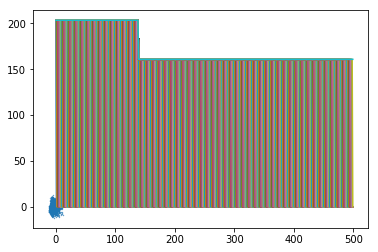

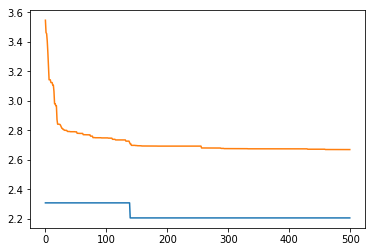

In [29]:
Descrete_Value = np.array([-100, 20 ])

def fun(X_Swarm): ## this is the sphere function
    
#     print((10**(6*np.arange(len(X_Swarm))/len(X_Swarm))))
    return np.sum((10**(0*np.arange(len(X_Swarm))/len(X_Swarm)))*(X_Swarm )**2,0)




class Problem(object):
    
    def __init__(self,Number_Of_Variables):
            self.Number_Of_Variables = Number_Of_Variables
            self.Upper_Bounds = 10*np.ones(Number_Of_Variables) ## they called thus up
            self.Lower_Bounds = -10*np.ones(Number_Of_Variables) ## they called it lb
            self.fobj = fun
            
            ## This is to set the binary varibale bounds
            self.Upper_Bounds[8] = Descrete_Value[1]
            self.Lower_Bounds[8] = Descrete_Value[0]
            self.Upper_Bounds[9] = Descrete_Value[1]
            self.Lower_Bounds[9] = Descrete_Value[0]
            
Number_Of_Variables = 10
problem = Problem(Number_Of_Variables)
Visualization_Flag = 1


Number_Of_Particles = 30 ### they called this noP
Number_Of_Iterations = 500 ## They called this maxlter

Position_History = np.zeros((Number_Of_Iterations,Number_Of_Particles,Number_Of_Variables))


Descrete_Indexes = np.array([8,9])
Continuous_Indexes = []
for i in range(0,Number_Of_Variables):
    if np.sum(Descrete_Indexes == i) == 0: ## meaning it is not descrete
        Continuous_Indexes.append(i)        
Continuous_Indexes = np.array([Continuous_Indexes]) 

print("Descrete_Indexes",Descrete_Indexes)
print("Continuous_Indexes",Continuous_Indexes)




O_min,X_min,Cost_Vector,Average_Objective = Optimize_With_PSO(problem,Number_Of_Particles,Number_Of_Iterations,Visualization_Flag)

if np.min(Cost_Vector < 10**-8):
    First_Index_Below_10_Minus_8 = np.min(np.arange(Number_Of_Iterations)[np.nonzero(Cost_Vector < 10**-8)])
    print(First_Index_Below_10_Minus_8)
    print(np.log10(First_Index_Below_10_Minus_8*Number_Of_Particles/Number_Of_Variables))


print("O_min",O_min)
print("X_min",X_min)

plt.figure(0)
plt.plot(np.log10(Cost_Vector))
plt.plot(np.log10(Average_Objective))


plt.figure(1)
plt.scatter(Position_History[:,:,0],Position_History[:,:,1],0.1)

0.0005311972908728863
0.0009250420198731553


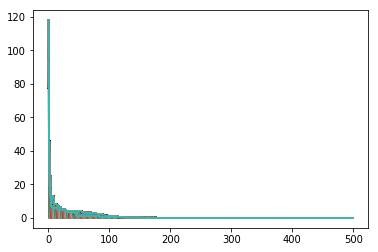

In [27]:


Number_Of_Particles = 30 ### they called this noP
Number_Of_Iterations = 500 ## They called this maxlter


O_min,X_min,Cost_Vector1,Average_Objective1 = Optimize_With_PSO(problem,Number_Of_Particles,Number_Of_Iterations,Visualization_Flag)
print(O_min)




Number_Of_Particles = 30 ### they called this noP
Number_Of_Iterations = 500 ## They called this maxlter


O_min,X_min,Cost_Vector2,Average_Objective2 = Optimize_With_PSO(problem,Number_Of_Particles,Number_Of_Iterations,Visualization_Flag)
print(O_min)